In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
colab_path = '/content/drive/MyDrive/2024_AI 보안 악성코드반/data/'
df_train = pd.read_csv(colab_path + 'part5_titanic_train.csv')
df_test = pd.read_csv(colab_path + 'part5_titanic_test.csv')
print('학습데이터 : {}건, 테스트데이터 : {}건'.format(len(df_train), len(df_test)))

학습데이터 : 891건, 테스트데이터 : 418건


In [5]:
# 데이터 샘플 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 데이터 dimension 확인
df_train.shape

(891, 12)

In [7]:
# 구성 값 확인
df_train['Survived'].unique()

array([0, 1])

In [8]:
# value_counts()는 Series의 unique value를 count 해주는 함수
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)

Survived
0    61.62
1    38.38
Name: count, dtype: float64

In [10]:
# 결측치 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# 결측치 처리 - Embarked
# 가장 많이 나온 데이터로 대체
# value_counts() : 고유 값의 개수를 반환, dropna = False일 경우 NaN값도 포함하여 계산한다.
# idxmax() : 빈도 높은 값의 인덱스 반환
replace_value = df_train['Embarked'].value_counts(dropna=False).idxmax()
replace_value

'S'

In [12]:
# 결측치 대체 - Embarked
# fillna() : 결측치를 다른값으로 채우는 함수
df_train['Embarked'] = df_train['Embarked'].fillna(replace_value)

In [13]:
# 결측치 처리 - Age
# 추후 Age가 결측치인 데이터를 필터링하여 추가분석 할 수 있도록 column 생성
# isna() : 각 값이 NaN(결측값)인지 여부를 검사
# astype(int) : True와 False 값을 각각 정수 1과 0으로 변환
df_train['Age_isna'] = df_train['Age'].isna().astype(int)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [14]:
# 결측치 처리 - Age
# 평균값으로 대체(mode, median 값을 사용할 수도 있음)
replace_value = df_train['Age'].mean().round(2)
replace_value

29.7

In [15]:
# 결측치 처리(대체) - Age
df_train['Age'] = df_train['Age'].fillna(replace_value)

In [16]:
# 결측치 처리 - Cabin
# dropna() : 결측값이 있는 행이나 열을 삭제
df_cabin_notnull = df_train.dropna(subset=['Cabin'])
for pclass in range(1, 4):
  cabin_values = df_cabin_notnull[df_cabin_notnull['Pclass'] == pclass]['Cabin'].sort_values().values
  print('Pclass {}에 해당하는 Cabin의 값: {}\n'.format(pclass, cabin_values))

Pclass 1에 해당하는 Cabin의 값: ['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B18' 'B19' 'B20' 'B20' 'B22' 'B22'
 'B28' 'B28' 'B3' 'B30' 'B35' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42'
 'B49' 'B49' 'B5' 'B5' 'B50' 'B51 B53 B55' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B57 B59 B63 B66' 'B58 B60' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'B96 B98' 'B96 B98' 'B96 B98'
 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C123' 'C123' 'C124'
 'C124' 'C125' 'C125' 'C126' 'C126' 'C128' 'C148' 'C2' 'C2' 'C22 C26'
 'C22 C26' 'C22 C26' 'C23 C25 C27' 'C23 C25 C27' 'C23 C25 C27'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C52' 'C54'
 'C62 C64' 'C65' 'C65' 'C68' 'C68' 'C7' 'C70' 'C78' 'C78' 'C82' 'C83'
 'C83' 'C85' 'C86' 'C87' 'C90' 'C91' 'C92' 'C92' 'C93' 'C93' 'C95' 'C99'
 'D10 D12' 'D11' 'D15' 'D17' 'D17' 'D19' 'D20' 'D20' 'D21' 'D26' 'D26'
 'D28' 'D30' 'D33' 'D33' 'D35' 'D35' 'D36

In [17]:
# 결측치 처리 - Cabin : 해당 Feature 분석에서 제외
df_train = df_train.drop('Cabin', axis=1)

In [18]:
# 결측치 처리 결과 확인
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_isna       0
dtype: int64

In [19]:
# 이상값 처리 - unique 값이 많지 않고, 정규분포를 따르지 않는 것으로 파악되는 변수 'Age', 'Sex', 'Sibsp', 'Parch'에 대해 살펴보기
# Pclass(등급) unique 값
df_train['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [20]:
# Sex(성별) unique 값
df_train['Sex'].value_counts().sort_index()

Sex
female    314
male      577
Name: count, dtype: int64

In [21]:
# SibSp(탑승한 형제, 자매, 아내, 남편 수) unique 값
df_train['SibSp'].value_counts().sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

In [22]:
# Parch(탑승한 부모, 자식 수) unique 값
df_train['Parch'].value_counts().sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

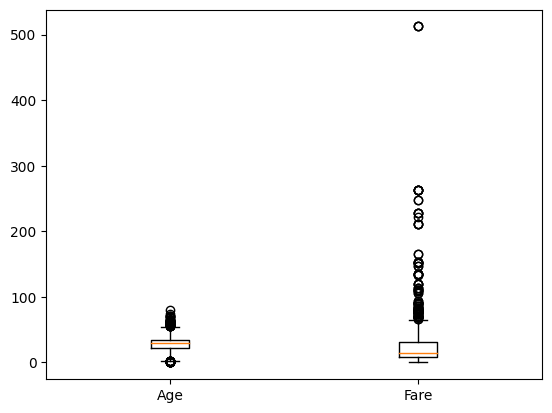

In [23]:
# 이상값 처리 - 연속형 실수 값을 가지는 Age, Fare 확인
plt.boxplot([df_train['Age'], df_train['Fare']])
plt.xticks([1, 2], ['Age', 'Fare'])
plt.show()

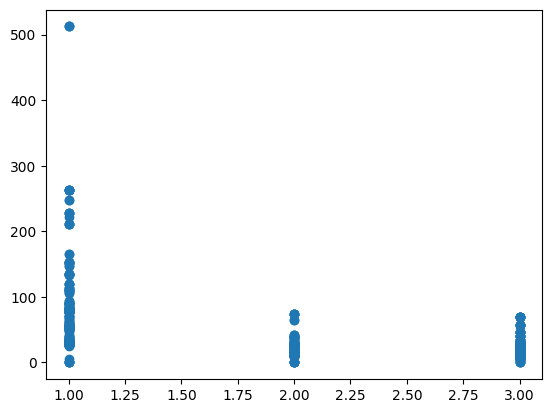

In [24]:
# 이상값 처리 - 연속형 실수 값을 가지는 Age, Fare 확인
# Age는 인간의 수명 범위 내이므로 Fare를 Pclass와 다시 한번 확인하기
plt.scatter(df_train['Pclass'], df_train['Fare'])
plt.show()

In [25]:
df_train.sort_values(by=['Fare'], ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,0


In [26]:
# 정규화 - 연속형 실수 값을 가지는 Age, Fare에 대해서만 정규화
columns_to_scale = ['Age', 'Fare']
scaler_train = preprocessing.StandardScaler()
scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592494,1,0,A/5 21171,-0.502445,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638776,1,0,PC 17599,0.786845,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284677,0,0,STON/O2. 3101282,-0.488854,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407912,1,0,113803,0.420730,S,0
4,5,0,3,"Allen, Mr. William Henry",male,0.407912,0,0,373450,-0.486337,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.207722,0,0,211536,-0.386671,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.823357,0,0,112053,-0.044381,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000054,1,2,W./C. 6607,-0.176263,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.284677,0,0,111369,-0.044381,C,0


In [27]:
# 인코딩 : 명목형 변수인 Sex, Embarked에 대해 수행
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_train.iloc[:, -5:]

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,False,True
887,True,False,False,False,True
888,True,False,False,False,True
889,False,True,True,False,False


In [28]:
# Cardinality가 높은 Name, Ticket 살펴보기
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

In [29]:
df_train['Name'].sort_values().values[:10]

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem'],
      dtype=object)

In [30]:
# Ticket은 분석에 의미 있게 사용될 것 같지 않으므로 제외, Name의 경우 포함된 호칭 부분을 추출해서 활용도 확인
df_train['Name'].str.extract('([A-Za-z]+)\.').value_counts(dropna=False)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
Name: count, dtype: int64

In [31]:
# 성별을 나타내는 호칭은 제외, 직업/사회적 지위를 나타내는 호칭을 포함
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
0,1,0,3,"Braund, Mr. Owen Harris",-0.592494,1,0,A/5 21171,-0.502445,0,False,True,False,False,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638776,1,0,PC 17599,0.786845,0,True,False,True,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.284677,0,0,STON/O2. 3101282,-0.488854,0,True,False,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407912,1,0,113803,0.420730,0,True,False,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",0.407912,0,0,373450,-0.486337,0,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.207722,0,0,211536,-0.386671,0,False,True,False,False,True,1
887,888,1,1,"Graham, Miss. Margaret Edith",-0.823357,0,0,112053,-0.044381,0,True,False,False,False,True,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.000054,1,2,W./C. 6607,-0.176263,1,True,False,False,False,True,0
889,890,1,1,"Behr, Mr. Karl Howell",-0.284677,0,0,111369,-0.044381,0,False,True,True,False,False,0


In [32]:
df_train = df_train.drop(['Name', 'Ticket'], axis=1)
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
0,1,0,3,-0.592494,1,0,-0.502445,0,False,True,False,False,True,0
1,2,1,1,0.638776,1,0,0.786845,0,True,False,True,False,False,0
2,3,1,3,-0.284677,0,0,-0.488854,0,True,False,False,False,True,0
3,4,1,1,0.407912,1,0,0.420730,0,True,False,False,False,True,0
4,5,0,3,0.407912,0,0,-0.486337,0,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207722,0,0,-0.386671,0,False,True,False,False,True,1
887,888,1,1,-0.823357,0,0,-0.044381,0,True,False,False,False,True,0
888,889,0,3,0.000054,1,2,-0.176263,1,True,False,False,False,True,0
889,890,1,1,-0.284677,0,0,-0.044381,0,False,True,True,False,False,0


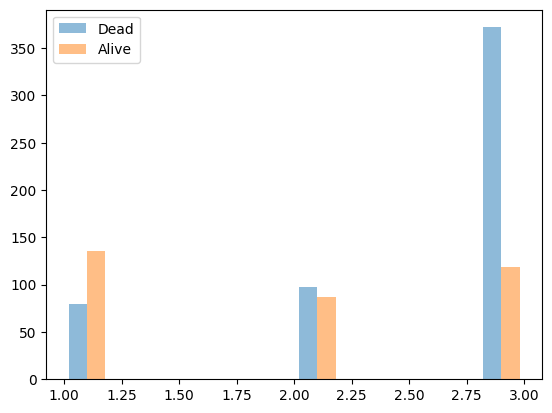

In [33]:
# 산포도 분석
hist1 = df_train[df_train['Survived']==0]['Pclass']
hist2 = df_train[df_train['Survived']==1]['Pclass']
plt.hist([hist1, hist2], label=['Dead', 'Alive'], alpha=0.5)
plt.legend(loc=0)
plt.show()

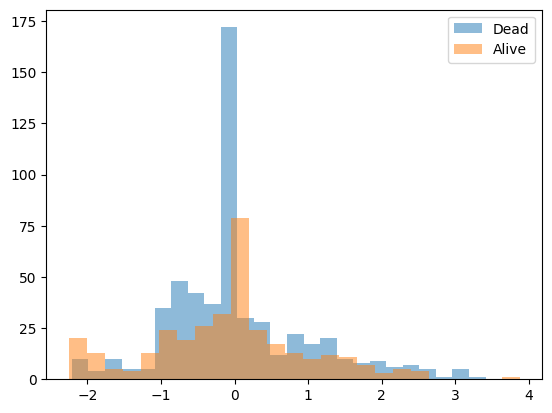

In [34]:
hist1 = df_train[df_train['Survived']==0]['Age']
hist2 = df_train[df_train['Survived']==1]['Age']
plt.hist(hist1, label='Dead', bins=25, alpha=0.5)
plt.hist(hist2, label='Alive', bins=25, alpha=0.5)
plt.legend(loc=0)
plt.show()

In [35]:
# 상관관계 계산
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
df_train[cols_to_corr].corr().round(2)

,Pclass,Age,SibSp,Parch,Fare,Name_has_title
Pclass,1.00,-0.33,0.08,0.02,-0.55,-0.05
Age,-0.33,1.00,-0.23,-0.18,0.09,-0.17
SibSp,0.08,-0.23,1.00,0.41,0.16,0.23
Parch,0.02,-0.18,0.41,1.00,0.22,0.17
Fare,-0.55,0.09,0.16,0.22,1.00,0.04
Name_has_title,-0.05,-0.17,0.23,0.17,0.04,1.00


([<matplotlib.axis.YTick at 0x7c62d0c1b880>,
 [Text(0, 0.5, 'Pclass'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'SibSp'),
  Text(0, 3.5, 'Parch'),
  Text(0, 4.5, 'Fare'),
  Text(0, 5.5, 'Name_has_title')])

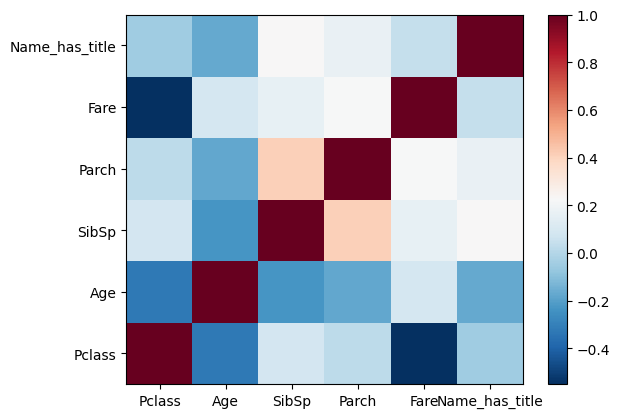

In [36]:
# 상관관계 시각화
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(df_train[cols_to_corr].corr().round(2), cmap='RdBu_r')
fig.colorbar(c, ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocessing(df_orig, mode='train', replace_embarked=None, replace_age=None, scaler=None):
    df = df_orig.copy()
    if mode == 'train':
        replace_embarked = df['Embarked'].value_counts(dropna=False).idxmax()
        replace_age = df['Age'].mean().round(2)

    df['Age_isna'] = df['Age'].isna().astype(int)
    df['Embarked'] = df['Embarked'].fillna(replace_embarked)
    df['Age'] = df['Age'].fillna(replace_age)

    if mode == 'train':
        scaler = StandardScaler()
        scaler.fit(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])

    df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
    df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    return df, replace_embarked, replace_age, scaler


In [45]:
df_train = pd.read_csv(colab_path + 'part5_titanic_train.csv')
df_test = pd.read_csv(colab_path + 'part5_titanic_test.csv')

df_train, replace_embarked, replace_age, scaler = preprocessing(df_train, mode='train')

df_test, _, _, _ = preprocessing(df_test, mode='test', replace_embarked=replace_embarked, replace_age=replace_age, scaler=scaler)

print(df_train.head())
print(df_test.head())


   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  Age_isna  \
0            1         0       3 -0.592494      1      0 -0.502445         0   
1            2         1       1  0.638776      1      0  0.786845         0   
2            3         1       3 -0.284677      0      0 -0.488854         0   
3            4         1       1  0.407912      1      0  0.420730         0   
4            5         0       3  0.407912      0      0 -0.486337         0   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Name_has_title  
0       False      True       False       False        True               0  
1        True     False        True       False       False               0  
2        True     False       False       False        True               0  
3        True     False       False       False        True               0  
4       False      True       False       False        True               0  
   PassengerId  Pclass       Age  SibSp  Parch     

In [46]:
target_col = 'Survived'
train_y = df_train[target_col]
train_X = df_train.drop(columns=[target_col])
train_X = train_X.set_index('PassengerId')

In [47]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=42)
train_X

,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
PassengerId,,,,,,,,,,,,
446,1,-1.977672,0,2,0.999770,0,False,True,False,False,True,1
651,3,0.000054,0,0,-0.489442,1,False,True,False,False,True,0
173,3,-2.208535,1,1,-0.424256,0,True,False,False,False,True,0
451,2,0.484867,1,2,-0.089684,0,False,True,False,False,True,0
315,2,1.023547,1,1,-0.119886,0,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,-0.669448,0,0,-0.494391,0,True,False,False,False,True,0
271,1,0.000054,0,0,-0.024246,1,False,True,False,False,True,0
861,3,0.869639,2,0,-0.364355,0,False,True,False,False,True,0


In [48]:
# 모델 1. Logistic Regression 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 20, max_iter = 1000, random_state=42)
model.fit(train_X, train_y)

LogisticRegression(C=20, max_iter=1000, random_state=42)

In [49]:
# 모델 2. SVM 학습
from sklearn.svm import SVC
model2 = SVC(kernel='linear', probability=True, random_state=42)
model2.fit(train_X, train_y)

SVC(kernel='linear', probability=True, random_state=42)

In [50]:
# 모델 3. Random Forest 학습
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth=3, random_state=42)
model3.fit(train_X, train_y)

RandomForestClassifier(max_depth=3, random_state=42)

In [51]:
# 모델 1 평가
print(model.score(train_X, train_y))
print(model.score(val_X, val_y))

0.8154093097913323
0.8022388059701493


In [52]:
# 모델 2 평가
print(model2.score(train_X, train_y))
print(model2.score(val_X, val_y))

0.797752808988764
0.7910447761194029


In [53]:
# 모델 3 평가
print(model3.score(train_X, train_y))
print(model3.score(val_X, val_y))

0.826645264847512
0.7947761194029851


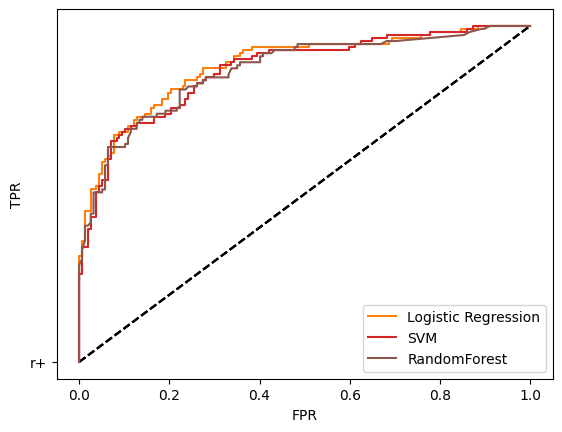

In [54]:
# ROC 커브로 3가지 모델 성능 비교
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, model.predict_proba(val_X)[:, 1])
plt.plot([0, 1], [0, 1], 'k--', 'r+')
plt.plot(fpr, tpr, label='Logistic Regression')
fpr2, tpr2, thresholds2 = roc_curve(val_y, model2.predict_proba(val_X)[:, 1])
plt.plot([0, 1], [0, 1], 'k--', 'r+')
plt.plot(fpr2, tpr2, label='SVM')
fpr3, tpr3, thresholds3 = roc_curve(val_y, model3.predict_proba(val_X)[:, 1])
plt.plot([0, 1], [0, 1], 'k--', 'r+')
plt.plot(fpr3, tpr3, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)
plt.show()

In [55]:
# AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(val_y, model.predict_proba(val_X)[:, 1]))
print(roc_auc_score(val_y, model2.predict_proba(val_X)[:, 1]))
print(roc_auc_score(val_y, model3.predict_proba(val_X)[:, 1]))

0.882366442875997
0.8696275893728123
0.8678487404602053


In [57]:
# 성능이 가장 좋은 Logistic Regression 모델 저장
import pickle
with open(colab_path + 'model.pkl', 'wb') as fw:
    pickle.dump(model, fw)

In [58]:
with open(colab_path + 'model.pkl', 'rb') as fr:
    model = pickle.load(fr)

In [61]:
df_test = pd.read_csv(colab_path + 'part5_titanic_test.csv')
df_test, _, _, _ = preprocessing(df_test, mode='test', replace_embarked=replace_embarked, replace_age=replace_age, scaler=scaler)


In [62]:
replace_fare = df_train['Fare'].mean().round(2)
df_test['Fare'] = df_test['Fare'].fillna(replace_fare)
test_X = df_test.set_index('PassengerId')

In [64]:
pred_y = model.predict(test_X)
df_result = pd.DataFrame({'PassengerId': test_X.index, 'Survived': pred_y})
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
